In [ ]:
#Change runtime to T4 GPU
#clone the yolov5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
#Import necessary requirnmnets
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Upload the football-players-detection.v4i.yolov5pytorch.zip in google colab and unzip with below code
!unzip /content/football-players-detection.v4i.yolov5pytorch.zip

Archive:  /content/football-players-detection.v4i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg  
 extracting: test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg  
 extracting: test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg  
 extracting: test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg  
 extracting: test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg  
 extracting: test/images/573e61_1_9_png.rf.e82af77d907cdc12dccbd6857f53b9b1.jpg  
 extracting: test/images/573e61_9_6_png.rf.fc52856b5974cb67862c25bae96f25ad.jpg  
 extracting: test/images/744b27_1_10_png.rf.e6f27d3b66a0c6720b9e9e50265251a6.jpg  
 extracting: test/images/744b27_7_4_png.rf.3431eaf3ff56847b5076376771bdf954.jpg  
 extracting: test/images/744b27_9_

In [ ]:
path_dataset = Path("/content/yolov5")
path_yaml = path_dataset / "data.yaml"

In [ ]:
len_train = len(list((path_dataset / "train/images").iterdir()))
len_val = len(list((path_dataset / "valid/images").iterdir()))
len_test = len(list((path_dataset / "test/images").iterdir()))
print(f"Number of examples: train-{len_train}, val-{len_val}, test-{len_test}")

Number of examples: train-204, val-38, test-13


In [ ]:
!python train.py --img 1280 --batch 8 --epochs 300 --data /content/yolov5/data.yaml --weights yolov5m.pt --cache

2024-04-08 17:22:51.262723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 17:22:51.262780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 17:22:51.395390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_

In [ ]:
!python val.py --weights /content/best.pt --data /content/yolov5/data.yaml --img 1280

val: data=/content/yolov5/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=1280, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-296-gae4ef3b2 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 17.8MB/s]
val: Scanning /content/yolov5/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<00:00, 923.22it/s]
val: New cache created: /content/yolov5/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:09<00:00,  4.72s/it]
                   all         38        905      0.904      0.864      0.895      0.669
                  ball         38  

In [ ]:
!python detect.py --weights /content/best.pt --img 1280 --conf 0.1 --source /content/yolov5/test/images


detect: weights=['/content/best.pt'], source=/content/yolov5/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-296-gae4ef3b2 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/13 /content/yolov5/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 1 ball, 22 players, 2 referees, 57.8ms
image 2/13 /content/yolov5/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 39.6ms
image 3/13 /content/yolov5/test/i

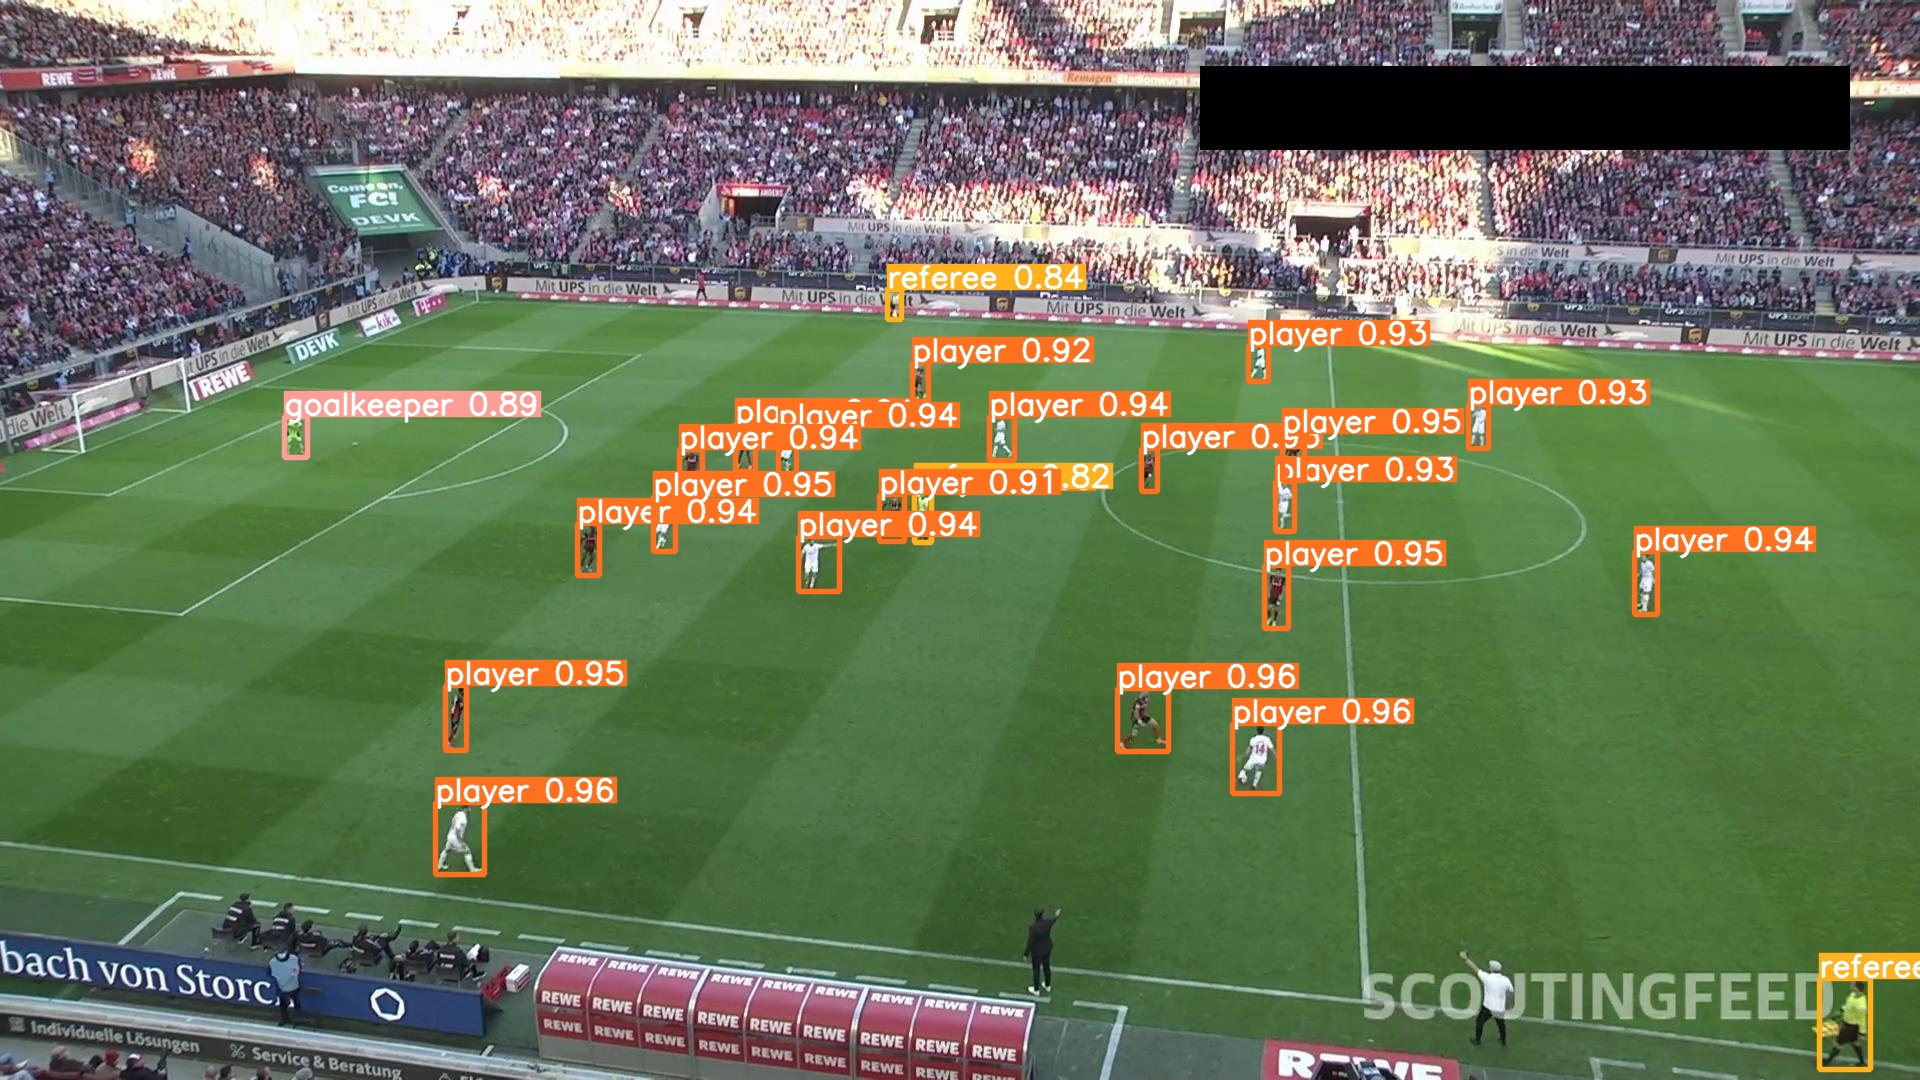

In [ ]:
import glob
from IPython.display import Image, display

for imageName in list(Path('/content/yolov5/runs/detect/exp/').iterdir())[:1]:
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import files

In [ ]:
#Downlaod this to get the results of training on your dataset
!zip -r /content/runs.zip /content/yolov5/runs/train/exp

	zip warning: name not matched: /content/yolov5/runs/train/exp

zip error: Nothing to do! (try: zip -r /content/runs.zip . -i /content/yolov5/runs/train/exp)
